1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

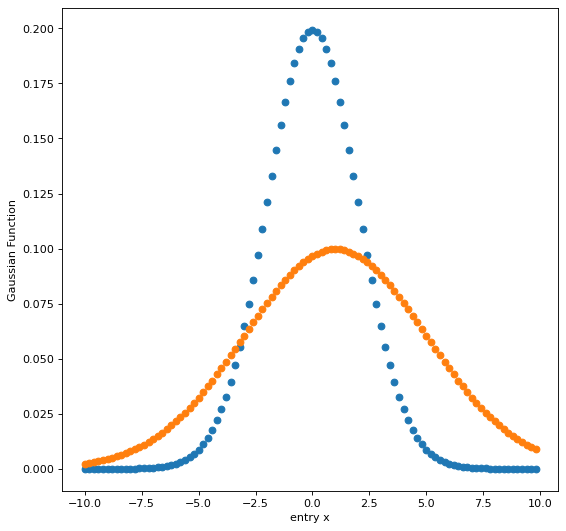

In [85]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

# b1 & b2 : mean values
def myGaussianFunc(b1,b2,sigma1,sigma2):
    myData1 = []
    myData2 = []
    a1=(1/(sigma1*math.sqrt(2*math.pi)))
    a2 = (1/(sigma2*math.sqrt(2*math.pi)))
    x = np.arange(-10,10,0.2)
    for i in x:
        myData1.append(a1 * np.exp(-((i-b1)**2)/(2*(sigma1**2))))
        myData2.append(a2 * np.exp(-((i-b2)**2)/(2*(sigma2**2))))
    myData = pd.DataFrame()
    myData['Data1'] = myData1
    myData['Data2'] = myData2
    return x, myData

x, myData = myGaussianFunc(0,1,2,4)



plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(x,'Data1',data=myData)
plt.scatter(x, 'Data2', data=myData)
plt.xlabel('entry x')
plt.ylabel('Gaussian Function')
plt.show()

In [ ]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

(40,)
[5.         1.08696581 1.06089744 1.03482906 1.00876068 0.98269231
 0.95662393 0.93055556 0.90448718 0.8784188  0.85235043 0.82628205
 0.80021368 0.7741453  0.74807692 0.72200855 0.69594017 0.66987179
 0.64380342 0.61773504 0.59166667 0.56559829 0.53952991 0.51346154
 0.48739316 0.46132479 0.43525641 0.40918803 0.38311966 0.35705128
 0.33098291 0.30491453 0.27884615 0.25277778 0.2267094  0.20064103
 0.17457265 0.14850427 0.1224359  0.09636752]
****************************************************************
(41, 2)
(40,)
(100,)


"\nresult.plot(\n    x='bin_centers',\n    y='mean',\n    xerr='xerr',\n    yerr='sem',\n    linestyle='none',\n    capsize=0,\n    color='black',\n)\n\n"

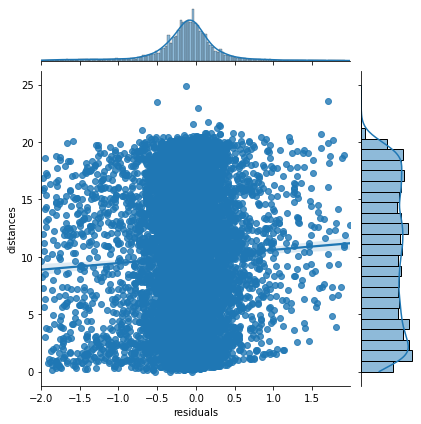

In [504]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
import pickle
import seaborn as sns

filename = "data/residuals_261.pkl"
infile = open(filename,'rb')
new_dict = pickle.load(infile)
infile.close()
# print(new_dict,new_dict.dtype) # While it is an object type
# print(type(new_dict[()]))# It's a dictionary type 
myDict = new_dict[()]

# https://numpy.org/devdocs/user/basics.indexing.html#arrays-indexing-fields 
# Now we can reach it as a dictionary. 
# An empty (tuple) index is a full scalar index into a zero-dimensional array. 
# x[()] returns a scalar if x is zero-dimensional and a view otherwise. 
# On the other hand, x[...] always returns a view.

df = pd.DataFrame(myDict)
#print(df)

masked_df = df[np.absolute(df['residuals'])<2]
#print(masked_df)


sns.jointplot(x="residuals", y="distances", data=masked_df, kind="reg")

#Second Part of the question

bins = np.linspace(df['residuals'].iloc[0],df['residuals'].iloc[-1],40)

#print(df.shape)
print(bins.shape)
df['bin'] = np.digitize(df['residuals'], bins=bins)

#print(df['bin'])
bin_w = bins[1] - bins[0]
x = 0.5 * (bins[:-1] + bins[1:])
print(x)

binned = df.groupby('bin')
result = binned['distances'].agg(['mean','sem'])
#print(result)
print("****************************************************************")
print(result.shape)
print(x.shape)
print(bin_centers.shape)
y=result['mean']

err_y = result['sem']







#result['x'] = x
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# I couldn' t find how to equalize the length of x and result columns to plot it.
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!





"""
result.plot(
    x='bin_centers',
    y='mean',
    xerr='xerr',
    yerr='sem',
    linestyle='none',
    capsize=0,
    color='black',
)

"""




*************************************************************
(10000,)
(100,)
(100, 4)


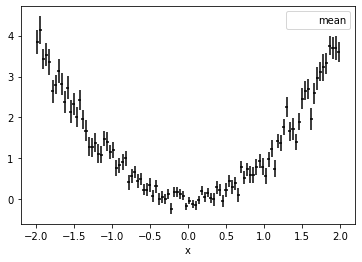

In [468]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# just some random numbers to get startet
x = np.random.uniform(-2, 2, 10000)
y = np.random.normal(x**2, np.abs(x) + 1)
df = pd.DataFrame({'x': x, 'y': y})


# calculate in which bin row belongs base on `x`
# bins needs the bin edges, so this will give as 100 equally sized bins
bins = np.linspace(-2, 2, 101)
df['bin'] = np.digitize(x, bins=bins)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]

# grouby bin, so we can calculate stuff
binned = df.groupby('bin')
# calculate mean and standard error of the mean for y in each bin
result = binned['y'].agg(['mean', 'sem'])
result['x'] = bin_centers
result['xerr'] = bin_width / 2
print("*************************************************************")
print(x.shape)
print(bin_centers.shape)
print(result.shape)
# plot it

result.plot(
    x='x',
    y='mean',
    xerr='xerr',
    yerr='sem',
    linestyle='none',
    capsize=0,
    color='black',
)
plt.savefig('result.png', dpi=300)


Related to changing values of distances between 0 and 20, residuals have a constant profile. It means that residual distribution is more or less the same for each distance value. On the other hand,
between -2 and 2, distances are symmetric according to 0 and more intensive between -0.5 and 0.5. And residuals peak around 0.

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


Integral of original Histogram  0.9966666666666668
Sum of Gaussians:  1.0000000000000002


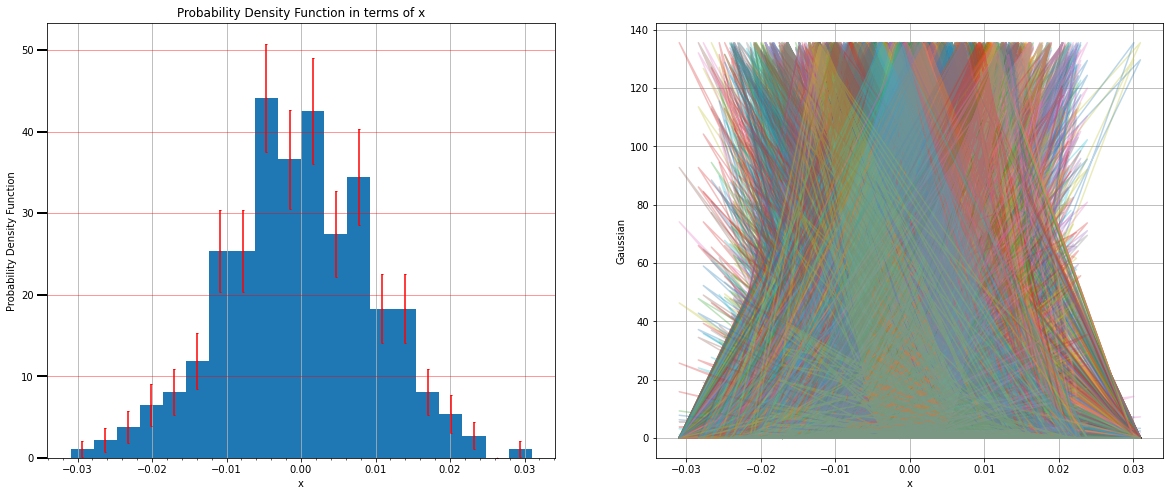

In [441]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import scipy.stats


x_mean, sigma, N = 0, 0.01, 600
x = np.random.normal(x_mean,sigma,N)
#print(x.shape)
fig, (ax,bx) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
num_bins = 20
bin_counts, bins, ignored = ax.hist(x, num_bins, density=True)
y =  1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - x_mean)**2 / (2 * sigma**2) )
#print(bin_counts)
ax.title.set_text('Probability Density Function in terms of x')
ax.set_xlabel("x")
ax.set_ylabel("Probability Density Function")
ax.grid()
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax.plot(bins,y,linewidth=2, color='r')
#ax.tick_params(which='both', width=20)
#ax.tick_params(which='major', length=8)
ax.tick_params(axis='y',which='major',direction='out', length=10, width=2,grid_color='r', grid_alpha=0.5)
#ax.tick_params(which='minor', length=4, color='b')


# Matplotlib's pyplot.hist returns the bin counts, bin edges,
# and the actual rendered blocks of the histogram (which we don't need)

bin_centres = (bins[:-1] + bins[1:]) / 2


bincenters = (bins[1:] + bins[:-1])/2
ax.errorbar(x=bincenters, y=bin_counts, yerr=np.sqrt(bin_counts), fmt='o', c='r', marker='*', markersize=1, capsize=1)



kde1 = scipy.stats.gaussian_kde(x)
kde2 = scipy.stats.gaussian_kde(x, bw_method='silverman')
sd = 1.06 * x.std() * (x.size ** -0.2)
G = []
counter = 0
for i in x:
    G.append(scipy.stats.norm(loc=i, scale=sd).pdf(x))
    bx.plot(x, G[counter], alpha=0.3)
    counter+=1
bx.set_xlabel('x')
bx.set_ylabel('Gaussian')
bx.grid()
#print("---------------------",len(G),x.size)
#cx.plot(x, kde1(x), 'k-')
#cx.title.set_text("Scott's Rule")
#dx.plot(x, kde2(x), 'r-')
#dx.title.set_text("Silverman's Rule")    
    
# Plot the error bars, centred on (bin_centre, bin_count), with length y_error
#plt.errorbar(x=bin_centres, y=bin_counts, yerr=y_error, fmt='o', capsize=2)

print("Integral of original Histogram ",scipy.integrate.trapz(bin_counts, dx=bins[1]-bins[0]))


#Integral of the original histogram

bin_width = bins[1] - bins[0]
# sum over number in each bin and mult by bin width, which can be factored out
Sum_G = bin_width * sum(bin_counts)
print("Sum of Gaussians: ",Sum_G)

plt.show()
